# 🔎 Análise da Temperatura Subaquática em Ilhas Costeiras da Santa Catarina 🌡

## 👤 Grupo

- Alice Santos Bulhões: RM554499
- Eduardo Oliveira Cardoso Madid: RM556349
- Nicolas Haubricht Hainfellner: RM556259
- Lucas Henzo Ide Yuki: RM554865

## 📄 Contextualização

A intensificação das mudanças climáticas ao longo das últimas décadas tem provocado impactos visíveis em todo o planeta, inclusive nos oceanos. Entre os efeitos mais notáveis está o aumento gradual da temperatura da água — um fenômeno que, segundo a NASA, representa uma elevação média de aproximadamente 1,5°C na superfície oceânica global no último século. Embora diferentes instituições apresentem variações nos dados — como os registros da NCEI, que indicam um aumento de 0,65°C em determinada série histórica —, todas apontam uma tendência clara: o aquecimento das águas é um processo contínuo e global.

![Gráfico NCEI](https://drive.google.com/uc?export=download&id=111F7rOOoRalmLiWkJcjdVHCkYOXjDVhQ)

Com base nesse panorama, nosso estudo concentra-se especificamente na costa do estado de Santa Catarina. Utilizando as ilhas costeiras como pontos de referência, foram coletadas informações ambientais detalhadas, como coordenadas geográficas, datas, horários, temperaturas e profundidades subaquáticas. Essa abordagem regional permite investigar, com mais precisão, como os padrões de aquecimento global se manifestam localmente, afetando diretamente a dinâmica dos ecossistemas marinhos da região.

Essa análise é fundamental para compreender as alterações térmicas impulsionadas tanto por fenômenos naturais — como as correntes oceânicas — quanto por ações humanas, especialmente as emissões de gases de efeito estufa. Ao identificar e mapear essas variações, contribuímos com dados importantes para a formulação de estratégias de conservação marinha e de adaptação às mudanças climáticas que impactam diretamente a biodiversidade e a qualidade de vida das comunidades costeiras catarinenses.



## 🚩 Problema

Com base neste conjunto de dados, o objetivo é responder a questões específicas sobre a variação da temperatura subaquática nas ilhas costeiras de Santa Catarina. A análise busca compreender como diferentes fatores influenciam essas variações e quais padrões podem ser identificados.  

As principais questões investigadas incluem:  

1. **Existe uma diferença significativa entre as temperaturas registradas nos diferentes locais monitorados?**  
2. **Há padrões sazonais ou diários na variação da temperatura?**  
3. **A temperatura apresenta uma tendência de aumento ou diminuição ao longo do tempo?**  
4. **Quais locais registram as temperaturas mais extremas (máximas e mínimas)?**  
5. **Como a temperatura varia em diferentes profundidades?**  
6. **A temperatura da água sofre alterações abruptas em determinados locais?**  
7. **Como a temperatura se comporta em diferentes profundidades ao longo das estações do ano?**  
9. **A temperatura da água apresenta correlação com fenômenos climáticos como El Niño e La Niña?**  

Para esta análise inicial, focaremos nas perguntas 1 e 2, buscando identificar se há diferenças significativas na temperatura entre os locais monitorados e se existem padrões sazonais ou diários nessas variações.  

## 👁‍🗨 Dados Disponíveis

### 📌 Fonte

Os dados analisados foram obtidos do conjunto "Underwater Surface Temperature Dataset", disponibilizado no [Kaggle](https://www.kaggle.com/datasets/shivamb/underwater-surface-temperature-dataset), uma plataforma amplamente utilizada para compartilhamento de datasets científicos. Originalmente, esse conjunto de dados provém do [SEANOE](https://www.seanoe.org/data/00510/62120/), um repositório de dados oceanográficos abertos que reúne medições detalhadas de parâmetros marinhos, como temperatura e profundidade, com identificação por DOIs para assegurar rastreabilidade e validade acadêmica.


### 🔎 Head

#### 📚 Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from plotnine import *
import numpy as np
import scipy.stats as stats
from scipy.stats import binom, poisson
import datetime

#### 🧰 Preparação de Dados

In [ ]:
# Variáveis de Colunas
name_column = {
    'ID': 'id',
    'Site': 'nome_ilha',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Date': 'data',
    'Time': 'hora',
    'Temp (°C)': 'temperatura',
    'Depth': 'profundidade'
}


# Acessando DataSet
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1tAs-xa2h9aFlbjaW-_FVsk6BPfqK1QQ1', encoding='ISO-8859-1')

# Renomeando Colunas
df = df.rename(columns=name_column)

# Converter 'data' para datetime
df['data'] = pd.to_datetime(df['data'], format='%Y/%m/%d')

# Função para determinar a estação
def obter_estacao(data):
    mes = data.month
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplicar função
df['estacao'] = df['data'].apply(obter_estacao)

#### 🥏 Exibindo Dataset

In [ ]:
df.head()

,id,nome_ilha,latitude,longitude,data,hora,temperatura,profundidade,estacao
0,1,Ilha Deserta,27.2706,48.331,2013-02-20,11:40:02,24.448,12.0,Verão
1,2,Ilha Deserta,27.2706,48.331,2013-02-20,12:00:03,24.448,12.0,Verão
2,3,Ilha Deserta,27.2706,48.331,2013-02-20,12:20:04,24.545,12.0,Verão
3,4,Ilha Deserta,27.2706,48.331,2013-02-20,12:40:05,24.448,12.0,Verão
4,5,Ilha Deserta,27.2706,48.331,2013-02-20,13:00:06,24.351,12.0,Verão


### 🔖 Tipos de variáveis presentes no dataset

O conjunto de dados contém diversas variáveis ambientais coletadas nas ilhas costeiras de Santa Catarina. Abaixo, estão os tipos de variáveis presentes no dataset e suas respectivas classificações:  

- **`id`** – *Variável quantitativa discreta*  
  - **Justificativa**: Representa um identificador único para cada registro, utilizando números inteiros sem valores fracionários.  

- **`nome_ilha`** – *Variável qualitativa nominal*  
  - **Justificativa**: Indica o nome das ilhas monitoradas, sem uma ordem específica entre os valores.  

- **`latitude`** – *Variável quantitativa contínua*  
  - **Justificativa**: Representa coordenadas geográficas em valores fracionários, permitindo medições precisas de localização.  

- **`longitude`** – *Variável quantitativa contínua*  
  - **Justificativa**: Assim como a latitude, é expressa em valores fracionários para indicar a posição geográfica.  

- **`data`** – *Variável quantitativa contínua*  
  - **Justificativa**: Quando convertida para um formato numérico (como timestamp), possibilita cálculos temporais contínuos.  

- **`hora`** – *Variável quantitativa contínua*  
  - **Justificativa**: Convertida para um formato numérico (exemplo: horas decimais), permitindo análises temporais detalhadas.  

- **`temperatura`** – *Variável quantitativa contínua*  
  - **Justificativa**: Medida em graus Celsius (°C), podendo assumir valores fracionários dentro de uma escala contínua.  

- **`profundidade`** – *Variável quantitativa contínua*  
  - **Justificativa**: Expressa em metros, com valores fracionários que representam diferentes níveis de profundidade da medição.  

- **`estacao`** – *Variável qualitativa ordinal*  
  - **Justificativa**: Representa as estações do ano (verão, outono, inverno, primavera) em uma ordem natural, permitindo análises sazonais da variação da temperatura.

Essa estrutura possibilita análises detalhadas sobre a variação da temperatura subaquática ao longo do tempo e em diferentes locais, auxiliando no entendimento das condições ambientais das ilhas monitoradas.  

## 🔎 Análise Exploratória de Dados

Para analisar as duas questões selecionadas, é fundamental compreender a localização das ilhas monitoradas, pois a posição geográfica pode influenciar as temperaturas da água, especialmente nas camadas mais próximas da superfície. De acordo com o *WorldAtlas*, a temperatura geralmente diminui à medida que a latitude aumenta, ou seja, regiões mais ao sul no hemisfério sul tendem a ser mais frias.

O mapa abaixo, elaborado com base nas coordenadas de latitude e longitude fornecidas no conjunto de dados, ilustra os pontos de coleta, sendo um ponto por ilha.

Essa representação visual facilita a identificação das ilhas e auxilia na compreensão de como sua posição geográfica pode afetar as temperaturas registradas.

### 🗾 Mapa com as Ilhas

In [ ]:
# Configurações iniciais
COORD_CRS = 'EPSG4326'  # Sistema de coordenadas padrão
MAP_TILES = 'CartoDB Dark_Matter' # Tema do Mapa

# Processa os dados - utiliza a primeira ocorrência de cada ilha
ilhas_unicas = df.drop_duplicates(subset=['nome_ilha'], keep='first').copy()

# Criar o mapa com limites e níveis de zoom ajustados
mapa_ilhas = folium.Map(
    location=[-ilhas_unicas['latitude'].mean(), -ilhas_unicas['longitude'].mean()],
    zoom_start=10,
    tiles=MAP_TILES,
    control_scale=True,
    prefer_canvas=True,
    max_bounds=True,
    min_zoom=8,
    max_zoom=12,
    width='100%',
    height='100%'
)

# 2. Adicionar marcadores individuais com popups ricos
for idx, row in ilhas_unicas.iterrows():
    # HTML estilizado
    popup_html = f"""
    <div style="font-family: Arial; width: 250px;">
        <h4 style="color: blue; margin-bottom: 5px;">{row['nome_ilha']}</h4>
        <hr style="margin: 5px 0;">
        <p><b>Coordenadas:</b><br>
        Lat: {-row['latitude']:.6f}<br>
        Lon: {-row['longitude']:.6f}</p>
    </div>
    """

    # Marcador individual
    folium.Marker(
        location=[-row['latitude'], -row['longitude']],
        popup=folium.Popup(popup_html, max_width=300),
        icon=folium.Icon(
            color='blue',
            icon='info-sign'
        ),
        tooltip=f"Clique para detalhes de {row['nome_ilha']}"
    ).add_to(mapa_ilhas)

# Ajusta a visualização para todos os marcadores
bounds = [[-ilhas_unicas['latitude'].min(), -ilhas_unicas['longitude'].min()],
          [-ilhas_unicas['latitude'].max(), -ilhas_unicas['longitude'].max()]]
mapa_ilhas.fit_bounds(bounds)

# Exibe mapa
mapa_ilhas

Ao analisar o mapa, observa-se que a Ilha dos Lobos é a mais ao sul, enquanto a Ilha de Tamboretes está mais ao norte. As demais ilhas estão distribuídas entre essas duas extremidades, na seguinte ordem de sul para norte: Ilha do Coral, Ilhas Moleques do Sul, Ilha do Parcel do Xavier (Alunga), Ilha do Xavier, Ilha Deserta, Parcel da Pombinha e Ilha da Galé.

Agora, com essas informações, podemos analisar os dados de forma mais precisa para verificar se há uma diferença significativa entre as temperaturas registradas em diferentes locais. Essa análise permitirá entender melhor os padrões térmicos da região e identificar possíveis influências geográficas e ambientais na variação da temperatura da água.

### 🌡 Variação de Temperatura Entre Locais

Obter uma visão geral das temperaturas registradas nas águas ao redor das ilhas de **Santa Catarina** é fundamental para a análise. Para isso, serão utilizadas **medidas de tendência central**, como média, mediana e moda contínua, que permitem identificar padrões na distribuição dos dados e compreender a temperatura predominante na região.

Além disso, a análise dos valores **máximos e mínimos** ajudará a determinar a amplitude térmica e identificar extremos de temperatura. O **desvio padrão** também será calculado para medir a dispersão dos valores em relação à média, fornecendo uma visão mais precisa da variabilidade térmica.

Essas métricas oferecem um **panorama inicial** sobre o comportamento da temperatura da água, permitindo uma investigação mais aprofundada das variações térmicas entre os diferentes pontos monitorados. Confira abaixo o resumo dos dados:

#### ✨ Análise Estatística e Distribuição Espacial

##### 📼 Resumo de Dados

In [ ]:
# Estatísticas descritivas por ilha
summary_df_ilha = df.groupby(['nome_ilha'])['temperatura'].agg([
    'count', 'mean', 'median', 'min', 'max', 'std'
])

# Adicionar amplitude (diferença entre máximo e mínimo)
summary_df_ilha['Amplitude'] = summary_df_ilha['max'] - summary_df_ilha['min']

# Função para calcular a moda contínua usando KDE
def calcular_moda_continua(Xi):
    Xi = Xi.dropna()  # Remove NaNs
    if len(Xi) == 0:
        return None
    # Calculando a moda contínua (usando KDE - Kernel Density Estimation)
    kernel = stats.gaussian_kde(Xi)
    x_range = np.linspace(Xi.min(), Xi.max(), 100)
    densidade = kernel(x_range)
    moda_continua = x_range[np.argmax(densidade)]
    return moda_continua

# Calcular a moda contínua para cada ilha
moda_por_ilha_continua = df.groupby('nome_ilha')['temperatura'].apply(calcular_moda_continua)

# Adicionar a moda contínua ao DataFrame de resumo
summary_df_ilha['Moda'] = moda_por_ilha_continua

# Exibir o DataFrame atualizado
print(summary_df_ilha)


                             count       mean  median     min     max  \
nome_ilha                                                               
Ilha Deserta                 86152  22.250946  22.812  15.473  28.853   
Ilha da Galé                 50887  20.518897  20.329  15.569  28.357   
Ilha do Coral                28942  19.371290  18.996  14.517  25.416   
Ilha dos Lobos               24487  20.026616  19.567  14.517  26.585   
Moleques do Sul              42467  20.041632  19.567  14.421  26.781   
Parcel da Pombinha           41438  20.166279  19.853  15.664  26.097   
Parcel do Xavier (Alalunga)  49690  19.506198  19.092  14.517  27.075   
Tamboretes                   50798  22.038685  22.333  15.855  29.252   
lha do Xavier                33773  20.583530  20.329  14.517  26.390   

                                  std  Amplitude       Moda  
nome_ilha                                                    
Ilha Deserta                 2.871099     13.380  23.041485  
Ilha da Ga

A análise dos dados revela que as médias e medianas das temperaturas registradas são bastante próximas, indicando uma distribuição relativamente equilibrada. No entanto, mesmo pequenas variações térmicas podem impactar significativamente os ecossistemas aquáticos. A **Ilha do Coral**, segunda mais ao sul, apresenta a menor média e mediana de temperatura, enquanto a **Ilha Deserta**, quarta mais ao norte, possui os valores mais elevados. Essa diferença sugere uma possível correlação entre a temperatura da água e a latitude, já que a **inclinação do globo** influencia a forma como os raios solares atingem diferentes regiões, afetando diretamente a temperatura da superfície oceânica.

A análise da **moda** reforça essa relação. A **menor moda** – ou seja, a temperatura mais frequente mais baixa – foi registrada na **Ilha dos Lobos**, a ilha mais ao sul, enquanto a maior moda pertence à **Ilha Tamboretes**, situada ao norte. Esse padrão evidencia como a incidência solar varia com a latitude, influenciando diretamente a temperatura predominante em cada região.

##### 🌡 Dispersão e Estabilidade Térmica

Ao examinar a dispersão dos dados, observa-se que a **amplitude** – diferença entre a temperatura máxima e mínima – pode indicar a presença de extremos térmicos. A **Ilha Tamboretes** apresenta a maior amplitude, sugerindo uma **variação significativa** entre picos de calor e frio. A **Ilha Deserta** também possui **uma amplitude elevada**. Em contrapartida, a **Parcel da Pombinha**, terceira mais ao norte, exibe a **menor amplitude**, sugerindo um clima mais estável, com menor variação entre temperaturas **máximas e mínimas**. Isso pode indicar que ilhas mais afastadas dos extremos sul e norte possuem um regime térmico mais uniforme.

Outro indicador importante de dispersão é o **desvio padrão**, que mede a variabilidade dos dados. Os maiores desvios padrões foram observados nas **Ilhas Tamboretes** e dos **Lobos**, sugerindo que essas regiões apresentam maior variação térmica, possivelmente influenciada por fatores externos, como correntes marítimas e eventos climáticos. Além disso, essa **alta variabilidade** pode indicar a presença de outliers – temperaturas atipicamente baixas ou altas. Já a **Parcel da Pombinha**, que apresentou **a menor amplitude térmica**, também possui o **menor desvio padrão**, reforçando a ideia de estabilidade térmica em sua região.

Esses resultados demonstram que, embora as variações de temperatura possam parecer sutis, elas estão diretamente relacionadas à **localização geográfica** e podem ter **implicações significativas no ambiente marinho**. Além da **latitude**, outro fator essencial para essa variação térmica é a **profundidade** da medição, que será analisada posteriormente neste relatório.

#### 📉 Visualização Gráfica e Interpretação Ambiental

Para compreender melhor a distribuição das temperaturas, a seguir é apresentado o **Gráfico de Densidade de Frequência**, que permite uma visualização mais clara da **dispersão** dos dados:

##### ➿ Gráfico de Curva de Densidade

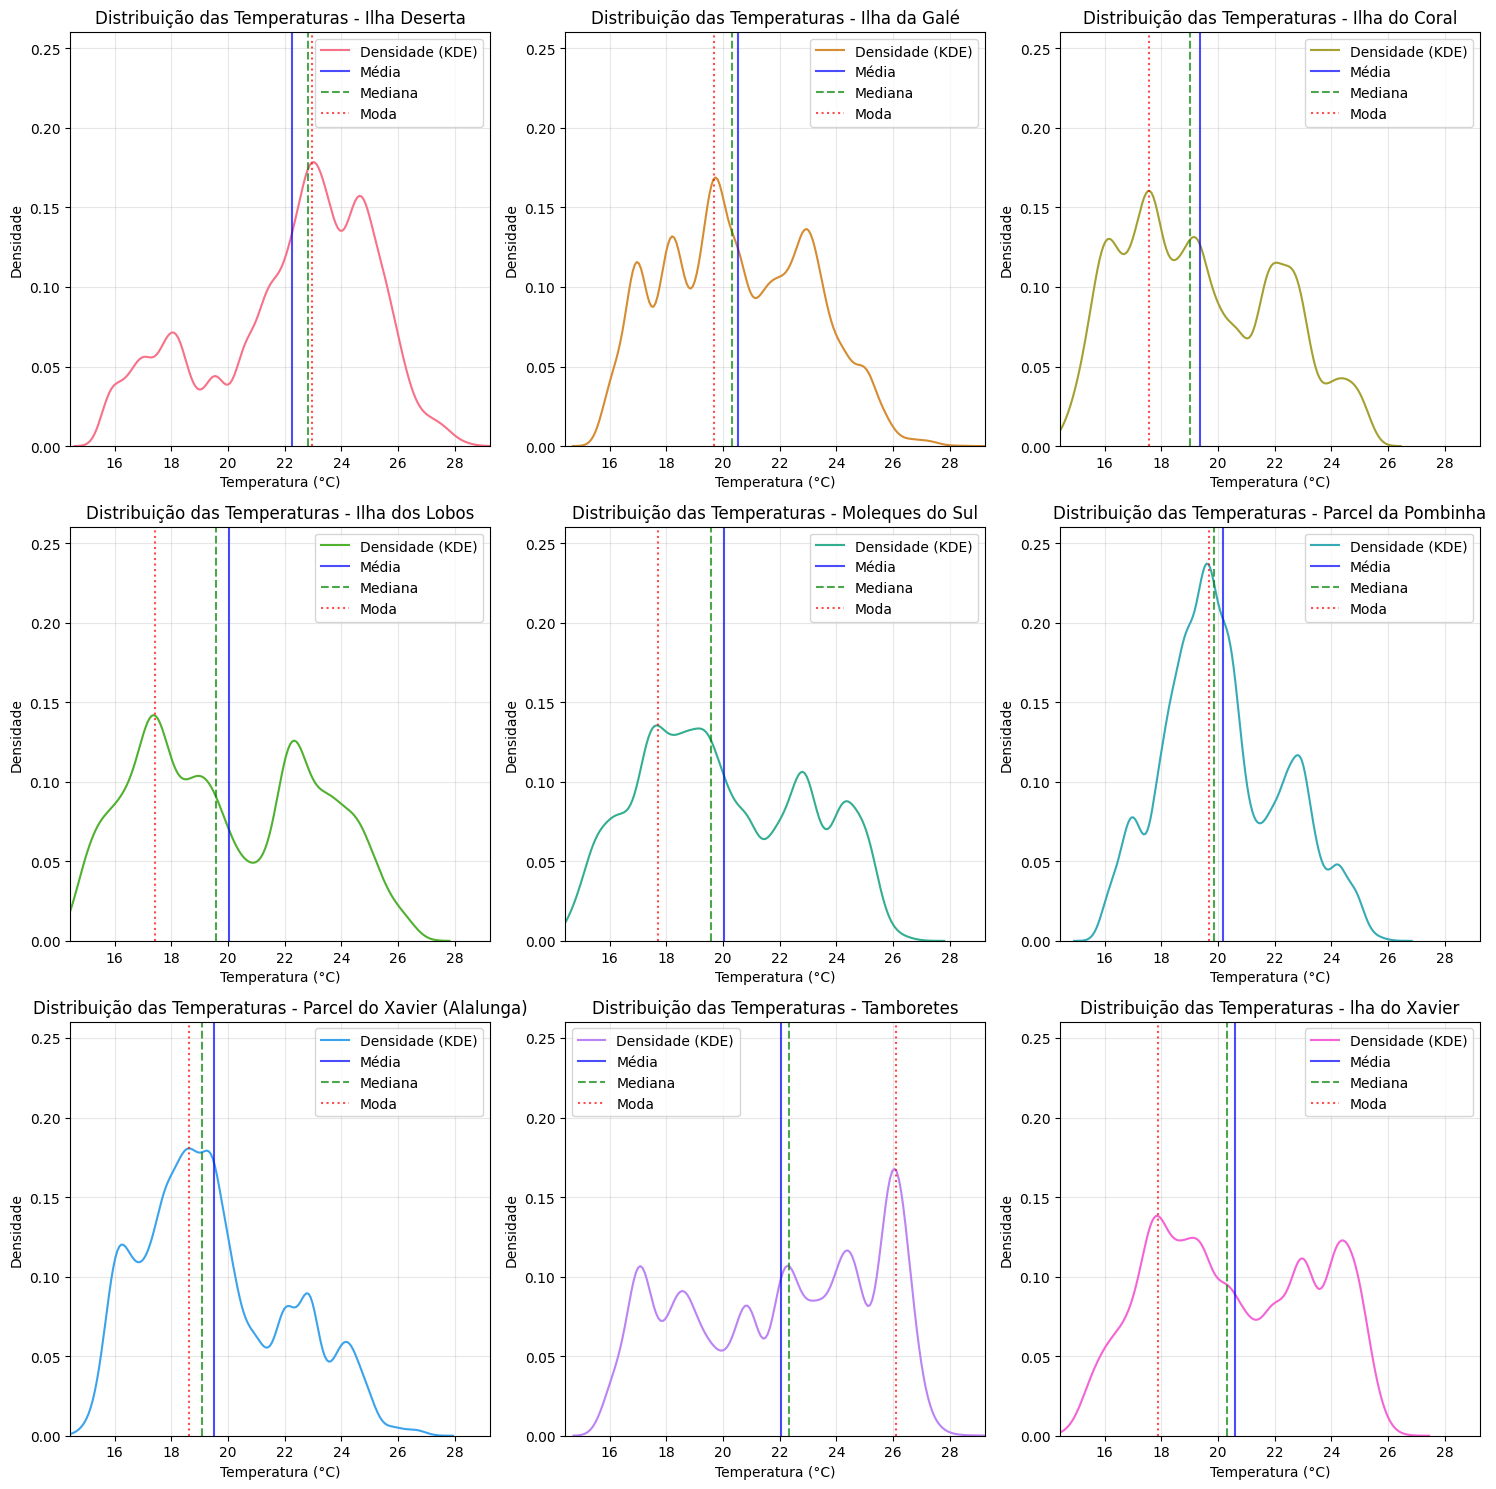

In [ ]:
# Paleta de cores para cada ilha
ilhas = df['nome_ilha'].unique()
cores = sns.color_palette("husl", len(ilhas))

# Cores fixas para as linhas
cor_media = "blue"
cor_mediana = "green"
cor_moda = "red"

# Definir o número de colunas e linhas para o subplot 3x3
n_colunas = 3
n_linhas = (len(ilhas) + n_colunas - 1) // n_colunas

# Cria a figura com subplots em uma grade 3x3
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 5 * n_linhas))
axes = axes.flatten()

# Determinar os limites globais para manter a escala consistente
todas_temperaturas = df['temperatura'].replace([np.inf, -np.inf], np.nan).dropna()
x_min = todas_temperaturas.min()
x_max = todas_temperaturas.max()

# Opcional: determinar limite global para o eixo y (densidade)
# Isso requer calcular a maior densidade de todas as ilhas
max_densidade = 0
for ilha in ilhas:
    dados = df[df['nome_ilha'] == ilha]['temperatura']
    dados = dados[np.isfinite(dados)]
    if len(dados) > 1:  # Evita erro com KDE se poucos pontos
        kde = stats.gaussian_kde(dados)
        temperaturas_suavizadas = np.linspace(x_min, x_max, 100)
        densidades = kde(temperaturas_suavizadas)
        max_densidade = max(max_densidade, max(densidades))

# Loop para criar subplots
for i, ilha in enumerate(ilhas):
    ax = axes[i]
    dados = df[df['nome_ilha'] == ilha]['temperatura']
    dados = dados[np.isfinite(dados)]

    # Calcular média, mediana e moda
    kde = stats.gaussian_kde(dados)
    temperaturas_suavizadas = np.linspace(x_min, x_max, 100)
    densidades = kde(temperaturas_suavizadas)
    moda = temperaturas_suavizadas[np.argmax(densidades)]
    media = np.mean(dados)
    mediana = np.median(dados)

    # KDE plot
    sns.kdeplot(dados, ax=ax, color=cores[i], label="Densidade (KDE)")

    # Linhas de estatísticas
    ax.axvline(media, color=cor_media, linestyle="solid", alpha=0.7, label="Média")
    ax.axvline(mediana, color=cor_mediana, linestyle="dashed", alpha=0.7, label="Mediana")
    ax.axvline(moda, color=cor_moda, linestyle="dotted", alpha=0.7, label="Moda")

    # Títulos e labels
    ax.set_title(f"Distribuição das Temperaturas - {ilha}")
    ax.set_xlabel("Temperatura (°C)")
    ax.set_ylabel("Densidade")
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Escalas fixas
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, max_densidade * 1.1)  # Margem extra

# Remove eixos não usados
for i in range(len(ilhas), len(axes)):
    fig.delaxes(axes[i])

# Layout final
plt.tight_layout()
plt.show()


O gráfico de densidade corrobora as análises anteriores, destacando que a Parcel da Pombinha apresenta um pico proeminente, ao contrário das demais ilhas, que possuem múltiplos picos. Esse padrão sugere que a temperatura da água ao redor da ilha tende a ser mais estável, possivelmente devido a fatores como menor influência de correntes marítimas ou características ambientais específicas. No entanto, é importante lembrar que esse não é o único fator determinante, pois a temperatura da água pode variar significativamente ao longo do dia devido à incidência solar, marés e outros elementos ambientais.

Observando a proximidade entre média e mediana das temperaturas, nota-se que três ilhas – Ilha de Galé, Ilha Deserta e Ilha de Parcel de Pombinha – possuem valores bastante próximos. Essas ilhas estão localizadas mais ao norte, mas, como mencionado anteriormente, a Ilha de Tamboretes apresenta uma grande dispersão de dados, com temperaturas tanto muito baixas quanto muito altas. Isso pode estar relacionado à influência do clima subtropical predominante em Santa Catarina, caracterizado por verões quentes e invernos frios, o que contribui para a amplitude térmica observada.

![Imagem do clima Brasil](https://drive.google.com/uc?export=download&id=1NJ_uvmd1Kjx6s3X9WVtkrgIbeoMkukiV)



#### 🌞 Variações Diurnas da Temperatura

Dando continuidade à análise, o próximo gráfico apresenta a variação das temperaturas médias ao longo do dia:

##### 🌡 Gráfico de Temperatura Média por Hora do Dia em Todas as Ilhas

                     nome_ilha  hora_max  temperatura_max  hora_min  \
0                 Ilha Deserta        14        22.429535         8   
1                 Ilha da Galé        17        20.600916         9   
2                Ilha do Coral        20        19.405192         7   
3               Ilha dos Lobos        16        20.148952         7   
4              Moleques do Sul        15        20.178089         5   
5           Parcel da Pombinha        19        20.251377        12   
6  Parcel do Xavier (Alalunga)        18        19.552880         3   
7                   Tamboretes        17        22.148054         9   
8                lha do Xavier        17        20.692571         2   

   temperatura_min  Amplitude (°C)  
0        22.062653        0.366882  
1        20.446177        0.154740  
2        19.329920        0.075272  
3        19.871378        0.277574  
4        19.921028        0.257062  
5        20.103074        0.148303  
6        19.458325        0.09

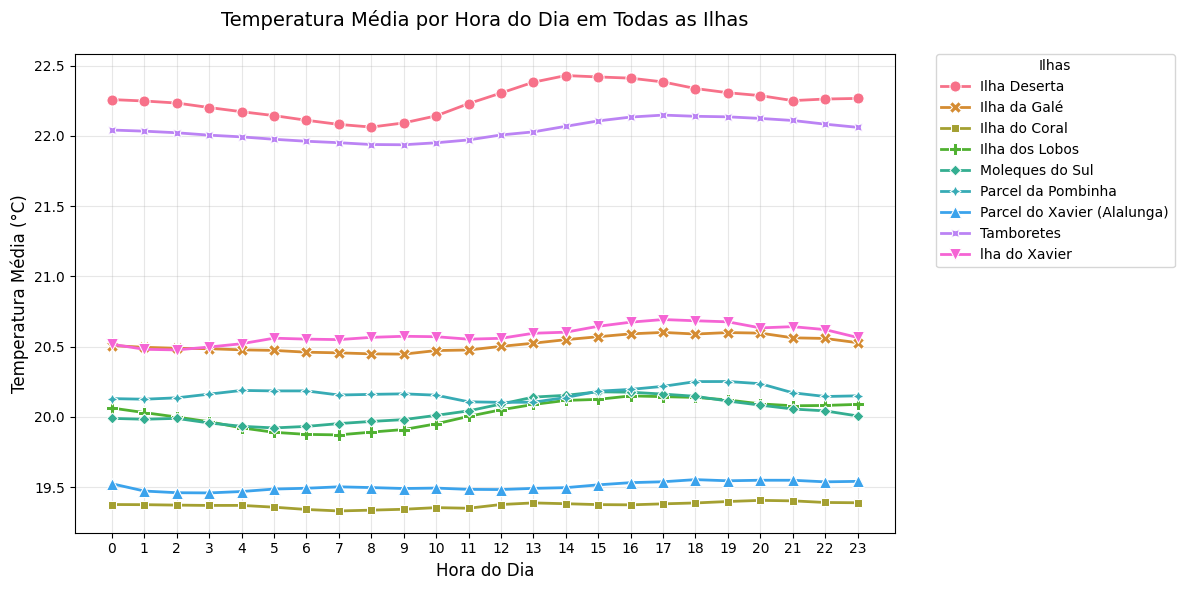

In [ ]:
# Pré-processamento dos dados
df['hora'] = df['hora'].astype(str)
df['hora'] = df['hora'].apply(lambda x: x if ":" in x else f"{x}:00:00")
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce').dt.hour

# Calcula a média por hora para cada ilha
media_por_hora_ilha = df.groupby(['nome_ilha', 'hora'])['temperatura'].mean().reset_index()

# Calcula a temperatura máxima e mínima por ilha e hora
max_temp = media_por_hora_ilha.loc[media_por_hora_ilha.groupby('nome_ilha')['temperatura'].idxmax()]
min_temp = media_por_hora_ilha.loc[media_por_hora_ilha.groupby('nome_ilha')['temperatura'].idxmin()]

# Preenche valores ausentes nas tabelas de temperatura máxima e mínima
max_temp = max_temp.dropna(subset=['temperatura'])
min_temp = min_temp.dropna(subset=['temperatura'])

# Garantir que as ilhas com ambos valores de temperatura (máxima e mínima) sejam combinadas
tabela_temp = pd.merge(max_temp[['nome_ilha', 'hora', 'temperatura']],
                       min_temp[['nome_ilha', 'hora', 'temperatura']],
                       on='nome_ilha', suffixes=('_max', '_min'))

# Calcula a amplitude de temperatura
tabela_temp['Amplitude (°C)'] = tabela_temp['temperatura_max'] - tabela_temp['temperatura_min']

# Exibe a tabela
print(tabela_temp[['nome_ilha', 'hora_max', 'temperatura_max', 'hora_min', 'temperatura_min', 'Amplitude (°C)']])

# Estilo do gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("husl")

# Configurações do Gráfico
sns.lineplot(
    x='hora',
    y='temperatura',
    hue='nome_ilha',
    style='nome_ilha',
    markers=True,
    dashes=False,
    data=media_por_hora_ilha,
    linewidth=2,
    markersize=8
)

# Configurações do gráfico
plt.title('Temperatura Média por Hora do Dia em Todas as Ilhas', fontsize=14, pad=20)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Temperatura Média (°C)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

# Legenda
plt.legend(
    title='Ilhas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibe Gráfico
plt.show()

Com base no gráfico, é possível observar variações térmicas distintas entre as ilhas ao longo do dia, revelando que fatores geográficos e ambientais influenciam diretamente o comportamento térmico de cada região. A Ilha Deserta se destaca por apresentar uma variação de temperatura mais acentuada, com diferenças marcantes entre os períodos mais quentes e mais frios do dia. Esse comportamento pode indicar uma menor influência de fatores moderadores, como a maritimidade ou correntes oceânicas.

A Ilha dos Tamboretes, localizada mais ao norte, apresenta temperaturas médias mais elevadas, o que reforça a tendência esperada: em latitudes menores (mais ao norte), a água tende a ser mais quente devido à maior incidência de radiação solar. Contudo, essa relação entre latitude e temperatura não se aplica de forma linear a todas as ilhas do estudo.

Um exemplo disso é a Ilha dos Lobos, situada mais ao sul, que surpreendentemente não apresenta as temperaturas mais baixas do conjunto, como seria esperado se apenas a latitude determinasse o padrão térmico. De forma ainda mais intrigante, a Ilha Coral, localizada mais ao norte que a Ilha dos Lobos, apresenta, em média, as menores temperaturas ao longo do dia. Essa inversão indica que a latitude, isoladamente, não é suficiente para explicar as diferenças observadas nas temperaturas da água.

Diversos fatores adicionais ajudam a entender essa complexidade. Um deles é a atuação de correntes oceânicas. Correntes quentes ou frias podem alterar significativamente a temperatura da água, independentemente da latitude. A presença de uma corrente fria pode explicar temperaturas abaixo da média, enquanto correntes quentes, como a Corrente do Brasil, podem aquecer águas em regiões mais ao sul.

Por fim, destaca-se o fenômeno do upwelling, em que águas frias das camadas mais profundas do oceano sobem à superfície, resfriando a temperatura local. Esse fenômeno é mais comum em regiões costeiras e pode ocorrer com maior intensidade em áreas mais ao sul, como é o caso da Ilha dos Lobos.

Apesar dessas diferenças, nota-se que a maioria das ilhas segue um padrão térmico diário semelhante: a temperatura atinge seu pico entre 12h e 16h, quando há maior radiação solar, e é mais baixa entre 00h e 06h, período de menor exposição solar e maior perda de calor acumulado. Essa oscilação é típica de ambientes costeiros e está relacionada à dinâmica de troca de calor entre a água, a atmosfera e a radiação solar.

Compreendida a dinâmica térmica ao longo do dia, torna-se essencial expandir essa análise para intervalos de tempo mais longos. No próximo segmento, investigaremos como a temperatura da água ao redor das ilhas de Santa Catarina se comporta ao longo das estações do ano, considerando as variações climáticas sazonais que afetam diretamente a energia solar incidente.

### 🌡 Padrões sazonais na variação da temperatura

#### ⚡ Gráfico Violino de Temperatura em Cada Estação do Ano

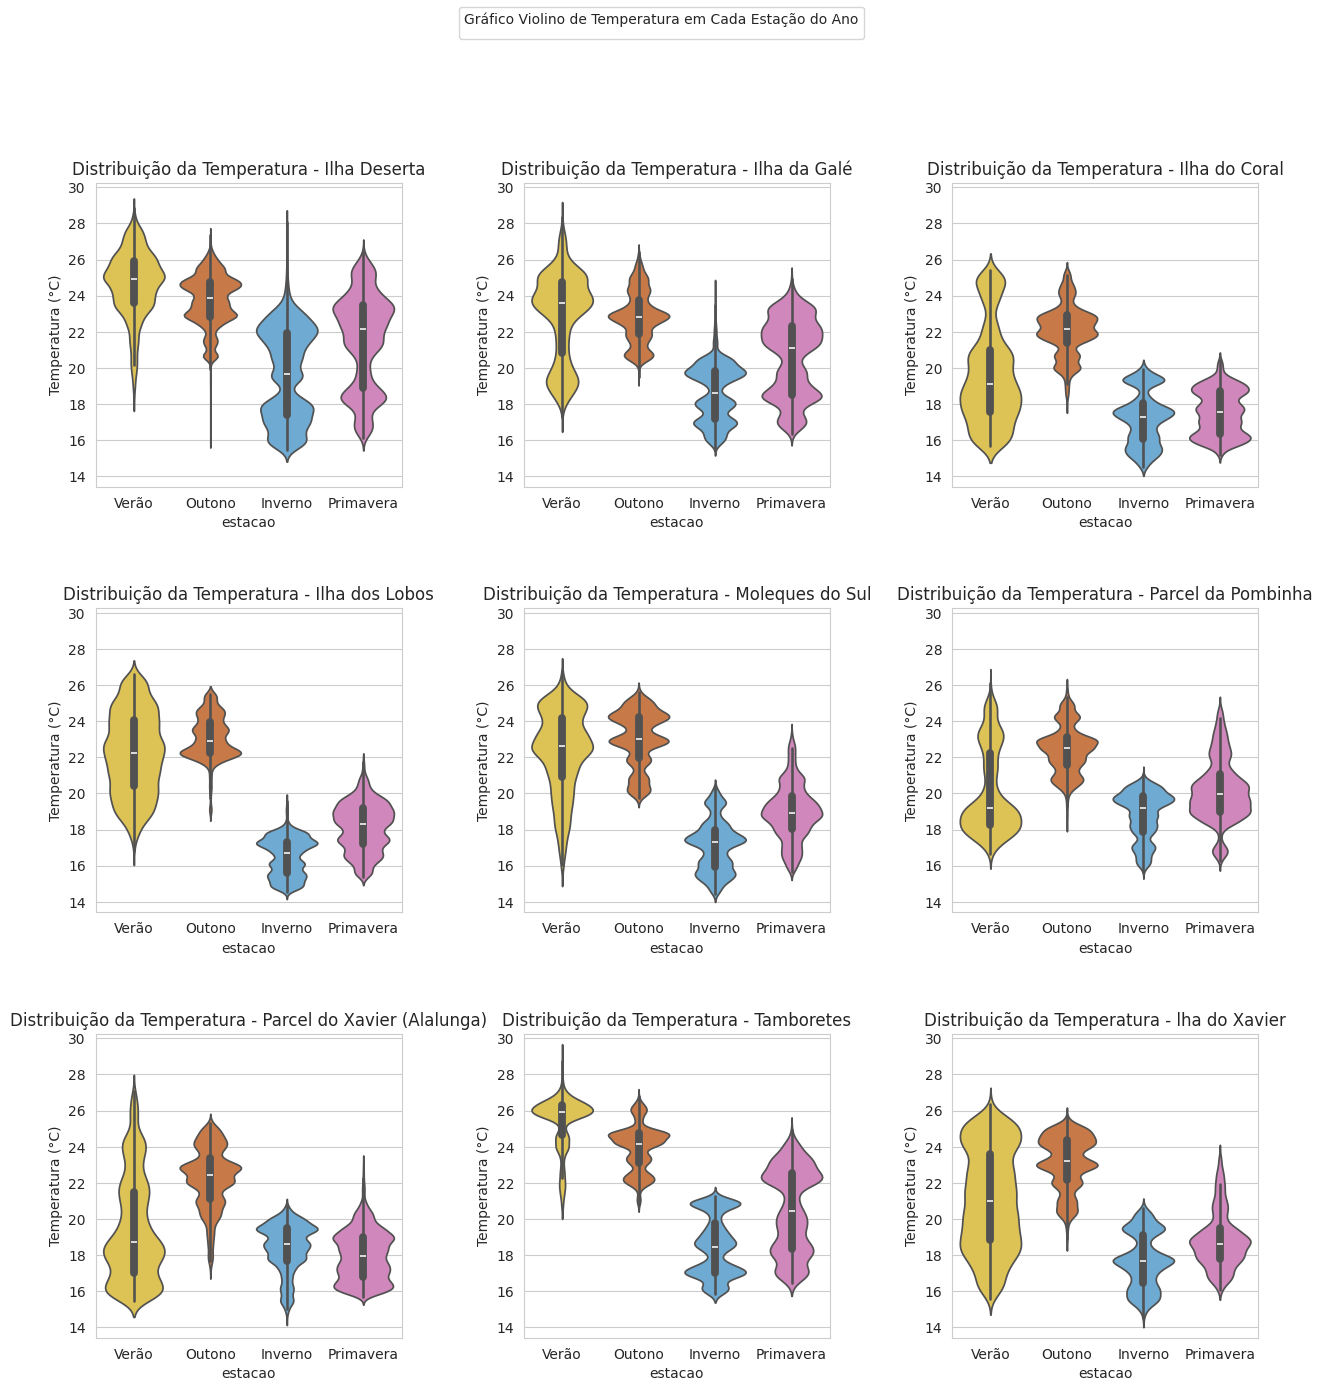

In [ ]:
# Definir ordem das estações como categoria ordenada
ordem_estacoes = ['Verão', 'Outono', 'Inverno', 'Primavera']
df['estacao'] = pd.Categorical(df['estacao'], categories=ordem_estacoes, ordered=True)

# Estilo do gráfico
sns.set_style("whitegrid")

# Cores das estações
cores_estacoes = {
    'Verão': '#f4d03f',
    'Outono': '#dc7633',
    'Inverno': '#5dade2',
    'Primavera': '#DC7BC1'
}

# Lista de ilhas únicas
ilhas = df['nome_ilha'].unique()

# Descobrir faixa de temperatura para padronizar os eixos Y
temp_min = df['temperatura'].min()
temp_max = df['temperatura'].max()

# Ajustar um pequeno "padding" para melhor visualização
padding = 1
ymin = temp_min - padding
ymax = temp_max + padding

# Criar grade de gráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, ilha in enumerate(ilhas):
    ax = axes[i // 3, i % 3]
    df_ilha = df[df["nome_ilha"] == ilha]

    sns.violinplot(x='estacao', y='temperatura', data=df_ilha, hue='estacao',
                   palette=cores_estacoes, order=ordem_estacoes, ax=ax, dodge=False)

    ax.set_title(f"Distribuição da Temperatura - {ilha}")
    ax.set_ylabel("Temperatura (°C)")
    ax.set_ylim(ymin, ymax)  # Escala fixa

# Legenda geral fora dos subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:4], labels[:4], title="Gráfico Violino de Temperatura em Cada Estação do Ano", loc='upper center', ncol=4)

plt.show()


Com base nos gráficos apresentados, é possível observar uma variação sazonal clara na temperatura da água do mar nos diferentes pontos de coleta. De maneira geral, as temperaturas mais elevadas ocorrem no verão, seguidas pelo outono e primavera, enquanto o inverno apresenta as menores médias. Essa tendência é consistente em quase todos os pontos analisados, embora a amplitude da variação possa ser influenciada por fatores como profundidade e latitude de cada local. Pontos mais rasos ou localizados em latitudes mais baixas tendem a apresentar temperaturas mais altas e maior variação ao longo do ano. Já áreas mais profundas ou em latitudes mais altas podem registrar menores variações sazonais. Essas diferenças refletem a influência direta da radiação solar, da estratificação térmica e da circulação oceânica no comportamento térmico das águas costeiras.

Nos gráficos de distribuição da temperatura da água do mar, diversos outliers podem ser identificados, especialmente nos períodos de verão e inverno, quando ocorrem variações mais extremas. Abaixo, destaco os principais pontos com presença notável de outliers:

- Ilha Deserta: Outliers para temperaturas abaixo de 18 °C no inverno, indicando eventos de resfriamento anômalo.

- Ilha da Galé: Outliers no verão e inverno, com registros abaixo de 18 °C no inverno e acima de 26 °C no verão.

- Ilha do Coral: Verifica-se a presença de outliers no verão com temperaturas acima de 26 °C e no inverno com valores próximos de 16 °C.

- Ilha dos Lobos: Apresenta diversos outliers no inverno com temperaturas abaixo de 16 °C.

- Moleques do Sul: Registra outliers no verão com temperaturas abaixo de 18 °C e no inverno com valores mínimos abaixo de 16 °C.

- Parcel da Pombinha: Possui outliers no inverno (abaixo de 18 °C) e verão (acima de 26 °C).

- Parcel do Xavier (Alalunga): Outliers no inverno, com algumas amostras inferiores a 18 °C, e no verão, superiores a 26 °C.

- Tamboretes: Apresenta grande número de outliers no verão, com valores acima de 28 °C, o que sugere aquecimento localizado ou baixa profundidade. Também há outliers no inverno com temperaturas inferiores a 18 °C.

- Ilha do Xavier: Outliers são observados no inverno (abaixo de 16 °C) e no verão (acima de 26 °C), indicando forte variação térmica.


Para compreender melhor se fatores como latitude e profundidade estão efetivamente relacionados às temperaturas mais baixas observadas, é necessário recorrer a uma análise estatística mais precisa. O uso do Coeficiente de Correlação entre variáveis quantitativas permite avaliar a força e a direção dessas possíveis relações. Esse tipo de análise é fundamental para confirmar se a tendência identificada nos gráficos — de que áreas mais profundas ou localizadas em latitudes mais elevadas registram menores temperaturas — é estatisticamente significativa. Essa verificação será abordada no próximo tópico.

## 📄 Correlação


Como mencionado anteriormente, foi identificada uma discrepância nas temperaturas entre as diferentes ilhas analisadas neste relatório. Suspeita-se que essa variação esteja relacionada à localização geográfica das ilhas — considerando tanto a distância em relação ao continente quanto a proximidade com o Equador. Neste momento, focaremos especialmente nos fatores de latitude e profundidade, avaliando sua possível correlação com as temperaturas registradas. A análise da influência da distância em relação ao continente será abordada em um relatório futuro, pois demanda dados mais específicos e detalhados.

Antes de aplicarmos o Coeficiente de Correlação para investigar a relação entre essas variáveis, será apresentada uma análise das temperaturas médias em diferentes profundidades. Essa etapa é essencial para verificarmos se há uma base consistente para prosseguir com a análise estatística. Veja o gráfico a seguir:

### 📈 Gráfico de Temperatura Média da Água por Profundidade em todas as Ilhas

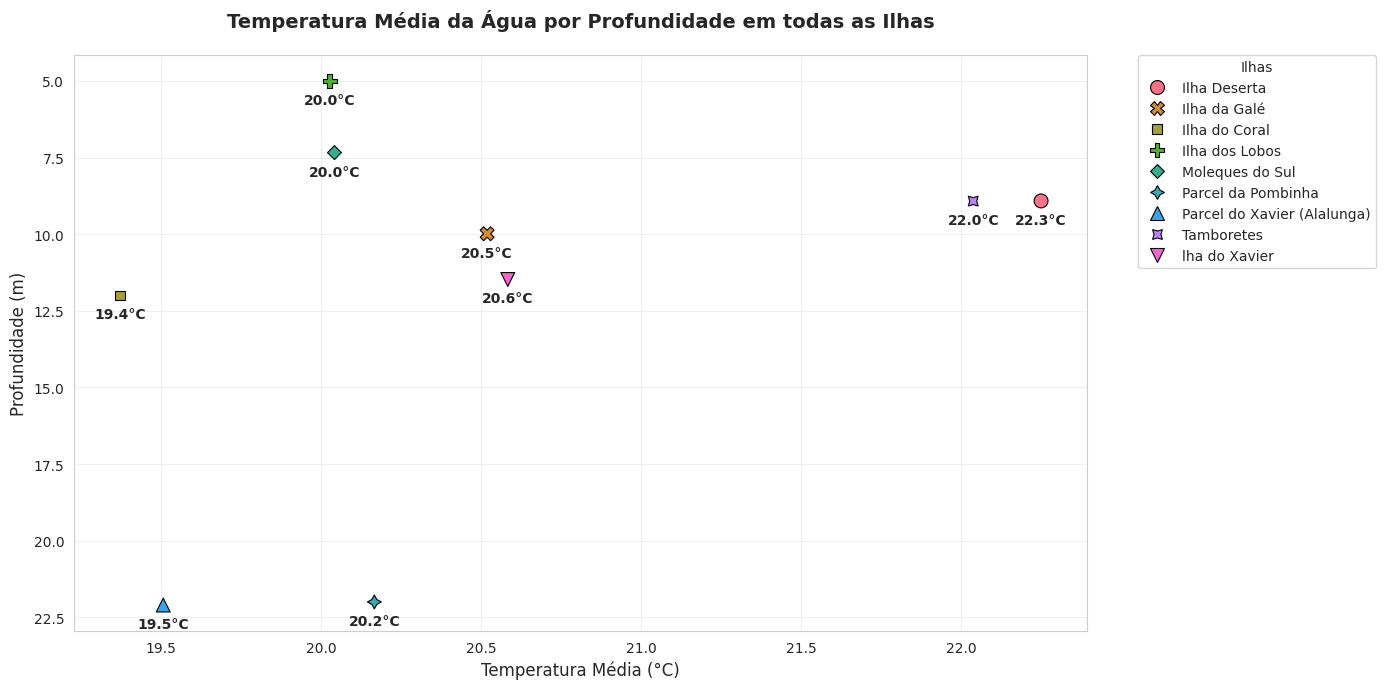

In [ ]:
# Configurar o estilo do gráfico
sns.set_style("whitegrid")
sns.set_palette("husl")  # Aplicando a mesma paleta do gráfico de linha

# Agrupar os dados por ilha e calcular a média da temperatura e profundidade
df_grouped = df.groupby('nome_ilha')[['temperatura', 'profundidade']].mean().reset_index()

# Criar a figura e o scatter plot
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(
    data=df_grouped,
    x='temperatura',
    y='profundidade',
    hue='nome_ilha',
    style='nome_ilha',
    palette='husl',
    s=100,
    edgecolor='black'
)

# Adicionar anotações para valores específicos
for i, row in df_grouped.iterrows():
  ax.text(row['temperatura'], row['profundidade'] + 0.75,
             f"{row['temperatura']:.1f}°C", fontsize=10, ha='center', fontweight='bold')

# Inverter o eixo Y para que o menor valor fique no topo
plt.gca().invert_yaxis()

# Ajustes no gráfico
plt.ylabel('Profundidade (m)', fontsize=12)
plt.xlabel('Temperatura Média (°C)', fontsize=12)
plt.title('Temperatura Média da Água por Profundidade em todas as Ilhas', fontsize=14, pad=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Legenda no mesmo formato
plt.legend(
    title='Ilhas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()


Ao observar o gráfico, nota-se que ilhas como Ilha Deserta e Tamboretes apresentam temperaturas médias mais elevadas (22,3 °C e 22,0 °C, respectivamente), mesmo em profundidades superiores a 7 metros. Por outro lado, locais como o Parcel do Xavier, situado a mais de 20 metros de profundidade, registram temperaturas médias mais baixas, como 19,5 °C. Esses dados reforçam a influência de fatores locais — como correntes marinhas quentes, tipo de fundo oceânico, insolação direta, mistura vertical da coluna d’água e a topografia submarina — na definição dos perfis térmicos.

Além disso, processos biológicos também desempenham um papel relevante. Áreas com maior concentração de organismos fotossintetizantes, como fitoplânctons, tendem a reter mais calor nas camadas superficiais. Em contrapartida, regiões mais profundas e ricas em matéria orgânica em decomposição podem apresentar temperaturas mais baixas, em função da menor incidência de luz solar e do maior consumo de oxigênio.

Adicionalmente, os dados sugerem que a latitude pode exercer uma influência mais significativa do que a profundidade. Isso porque muitas das ilhas situadas mais ao norte apresentam temperaturas médias mais altas, independentemente da profundidade. Contudo, é importante lembrar que esses valores podem ter sido afetados por outliers — como observado no caso da Ilha Tamboretes, que apresentou um alto desvio padrão.

Diante disso, torna-se essencial observar o gráfico do Coeficiente de Correlação geral para avaliarmos se nossas hipóteses sobre a relação entre essas variáveis se confirmam estatisticamente. Veja o gráfico a seguir:

### 🏁 Gráfico de Correlação

<ipython-input-10-fcb8284b45df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


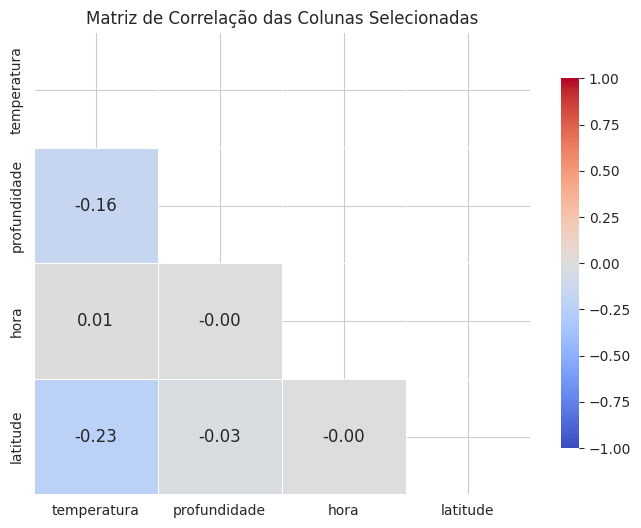

In [ ]:
# Selecionando as colunas específicas para calcular a correlação
colunas_selecionadas = ['temperatura', 'profundidade', 'hora', 'latitude']
dados_selecionados = df[colunas_selecionadas]

# Convertendo a coluna 'hora' para numérica (segundos desde a meia-noite)
dados_selecionados['hora'] = pd.to_datetime(dados_selecionados['hora'], format='%H', errors='coerce').dt.hour * 3600

# Calculando a matriz de correlação para as colunas selecionadas
M = dados_selecionados.corr()

# Gerando o gráfico de correlação com heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(M, annot=True, cmap='coolwarm', cbar=True,
            fmt=".2f", annot_kws={"size": 12},
            linewidths=0.5, mask=np.triu(M),
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Exibindo o gráfico
plt.title('Matriz de Correlação das Colunas Selecionadas')
plt.show()


A variação da temperatura da água em diferentes profundidades está diretamente relacionada à quantidade de radiação solar incidente, à ação das correntes oceânicas e à distribuição de massas de água com características térmicas distintas.

No gráfico gerado, observa-se uma tendência clara de diminuição da temperatura à medida que a profundidade aumenta. Isso ocorre porque as camadas mais superficiais absorvem a maior parte da energia solar, enquanto as camadas mais profundas recebem menos radiação, resultando em menor aquecimento.

Essa variação também pode ser influenciada por fatores como:

- **Termoclina**: Camada intermediária da coluna d’água onde ocorre uma queda acentuada da temperatura em um pequeno intervalo de profundidade.

- **Mistura de massas d’água**: Correntes marinhas podem redistribuir o calor, alterando o perfil térmico em diferentes regiões.

- **Diferenças entre ilhas**: A localização geográfica e as características físicas de cada ilha influenciam o comportamento térmico local, tema que será explorado em outro tópico.


Além disso, os dados sugerem que a latitude apresenta uma correlação mais significativa com a temperatura da água do que a profundidade. Os valores relativamente baixos do coeficiente de correlação podem ser atribuídos à limitação do número de pontos analisados (nove ilhas), além da possível presença de valores anômalos em locais específicos de medição.

## 📑 Conclusão

A análise exploratória dos dados de temperatura subaquática nas ilhas costeiras de Santa Catarina revelou padrões relevantes relacionados às variações térmicas entre diferentes locais, profundidades e estações do ano. O foco inicial concentrou-se nas diferenças de temperatura entre os pontos monitorados, bem como nos padrões sazonais e diários.

A **Parcel Pombinha**, frequentemente registrada no conjunto de dados, apresentou temperaturas relativamente estáveis. Essa estabilidade pode estar associada à sua localização geográfica específica, possivelmente menos exposta a variações térmicas acentuadas. Outras ilhas, embora com menor representatividade nos dados iniciais, também apresentaram variações térmicas que podem estar ligadas à influência de correntes marinhas, características topográficas ou à proximidade com o continente.

Os resultados também confirmaram uma tendência de queda nas temperaturas com o aumento da profundidade em algumas ilhas, fenômeno explicado pela menor penetração da radiação solar e pela presença da termoclina — uma camada de transição que provoca uma mudança térmica abrupta. No entanto, essa tendência não foi observada em todas as ilhas, o que pode indicar inconsistências nos dados, limitações amostrais ou que as médias calculadas não são plenamente representativas.

A análise sazonal, segmentada pelas quatro estações do ano (verão, outono, inverno e primavera), revelou temperaturas mais elevadas nos períodos de maior incidência solar, refletindo o aquecimento mais intenso das camadas superficiais. Além disso, observou-se que a latitude apresenta uma correlação mais significativa com a temperatura do que a profundidade, embora essa relação tenha sido limitada pelo número reduzido de ilhas analisadas (nove) e pela presença de possíveis valores atípicos.

Para aprofundar futuras análises, propõe-se o uso de distribuições probabilísticas, como Bernoulli e Poisson, para identificar intervalos críticos de temperatura e detectar mudanças abruptas ao longo do tempo, possibilitando a identificação de alterações significativas nos padrões térmicos. Além disso, recomenda-se uma análise das médias anuais de temperatura por ilha, complementada com a construção de mapas de calor que permitam uma visualização mais clara e detalhada dos padrões térmicos entre as diferentes regiões analisadas.

Além disso, para futuros relatórios, recomenda-se ampliar a abrangência da análise, incluindo não apenas as temperaturas subaquáticas das costas das ilhas mencionadas, mas também das regiões costeiras do Brasil como um todo, com perspectiva de expansão para uma escala global.

## 📎 Fontes

- [WorldAtlas - What Is The Effect Of Latitude On Temperature?](https://www.worldatlas.com/articles/what-is-the-effect-of-latitude-on-temperature.html?utm_source=chatgpt.com)

- [Mundo Educação - Relação entre latitude e clima](https://mundoeducacao.uol.com.br/geografia/relacao-entre-latitude-clima.htm)

- [Mundo Educação - Climas do Brasil](https://mundoeducacao.uol.com.br/geografia/classificacao-dos-climas-no-brasil.htm)

- [Maritimidade](https://pt.wikipedia.org/wiki/Maritimidade)

- [O que é o Upwelling?](https://prof.brunocarvalho.pt/o-que-e-o-upwelling/)

- [AGU - Thermocline Variability and Surface Temperatures](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015GL064220)

- [Temperatura em Florianópolis](https://www.seatemperature.org/south-america/brazil/florianopolis.htm)

- [Clima no sul do Brasil](https://www.weather2travel.com/brazil/south-brazil/)

- [Impactos de mudanças de temperatura](https://www.noaa.gov/news-release/ocean-temperature-changes-impact-marine-ecosystems)

- [Ocean Warming](https://climate.nasa.gov/vital-signs/ocean-warming/?intent=121)

- [About Seanoe](https://www.seanoe.org/html/about.htm)

- [IPCC Reports on Ocean Warming](https://www.ipcc.ch/srocc/)

- [NOAA Ocean Temperature Impacts](https://www.climate.gov/news-features/understanding-climate/climate-change-ocean-heat-content)

- [Gráfico de Aumento da Temperatura da Superfice da Água](https://www.interempresas.net/ObrasPublicas/Articulos/481162-Proteccion-costera-racional-eficiente-Empleo-modulos-mallas-acero-alta-resistencia.html)